In [1]:
# example of pixel normalization
from numpy import asarray
from PIL import Image

# load image
image = Image.open('bondi_beach.jpg')
pixels = asarray(image)

# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

# convert from integers to floats
pixels = pixels.astype('float32')

# normalize to the range 0-1
pixels /= 255.0

# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000


In [2]:
# cnn with single convolutional, pooling and output layer
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# create model
model = Sequential()

# add convolutional layer
model.add(Conv2D(32, (3,3), input_shape=(256, 256, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 516128)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 516129    
Total params: 516,449
Trainable params: 516,449
Non-trainable params: 0
_________________________________________________________________


In [3]:
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

# load an image from file
image = load_img('dog.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))


Doberman (33.59%)


In [4]:
# fit a cnn on the fashion mnist dataset
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

# load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# convert from integers to floats
trainX, testX = trainX.astype('float32'), testX.astype('float32')
# normalize to range 0-1
trainX,testX = trainX / 255.0, testX / 255.0
# one hot encode target values
trainY, testY = to_categorical(trainY), to_categorical(testY)
# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fit model
model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2)
# evaluate model
loss, acc = model.evaluate(testX, testY, verbose=0)
print(loss, acc)


Epoch 1/10
 - 85s - loss: 0.3800 - accuracy: 0.8648
Epoch 2/10
 - 84s - loss: 0.2586 - accuracy: 0.9061
Epoch 3/10
 - 82s - loss: 0.2150 - accuracy: 0.9201
Epoch 4/10
 - 81s - loss: 0.1868 - accuracy: 0.9304
Epoch 5/10
 - 88s - loss: 0.1582 - accuracy: 0.9406
Epoch 6/10
 - 86s - loss: 0.1364 - accuracy: 0.9496
Epoch 7/10
 - 88s - loss: 0.1183 - accuracy: 0.9560
Epoch 8/10
 - 93s - loss: 0.1010 - accuracy: 0.9628
Epoch 9/10
 - 86s - loss: 0.0883 - accuracy: 0.9671
Epoch 10/10
 - 93s - loss: 0.0744 - accuracy: 0.9727
0.3194623906135559 0.9121999740600586


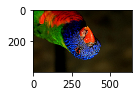

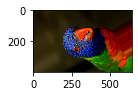

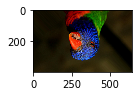

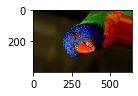

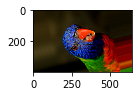

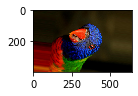

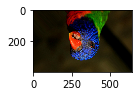

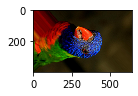

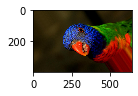

In [5]:
# example using image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = load_img('bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
# define subplot
    pyplot.subplot(330 + 1 + i)
# generate batch of images
    batch = it.next()
# convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
# plot raw pixel data
    pyplot.imshow(image)
# show the figure
    pyplot.show()



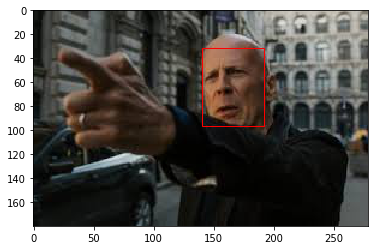

In [25]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

# load image from file
pixels = pyplot.imread('exp.jpg')
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# plot the image
pyplot.imshow(pixels)
# get the context for drawing boxes
ax = pyplot.gca()
# get coordinates from the first face
x, y, width, height = faces[0]['box']
# create the shape
rect = Rectangle((x, y), width, height, fill=False, color='red')
# draw the box
ax.add_patch(rect)
# show the plot
pyplot.show()
    